# Задание 10

Я создала папочку task10, где и работала. В ней создала папки:

mkdir -p fastqc_raw fastqc_trimmed trimmed_reads
fastqc /projects/mipt_dbmp_biotechnology/genome/illumina_reads_R1_001.fastq \
       /projects/mipt_dbmp_biotechnology/genome/illumina_reads_R2_001.fastq \
       -o fastqc_raw

FastQC отработал и создал отчёты для обоих файлов:

illumina_reads_R1_001.fastq
illumina_reads_R2_001.fastq

У меня есть такие файлы:
ls fastqc_raw/
illumina_reads_R1_001_fastqc.html  illumina_reads_R2_001_fastqc.html
illumina_reads_R1_001_fastqc.zip   illumina_reads_R2_001_fastqc.zip

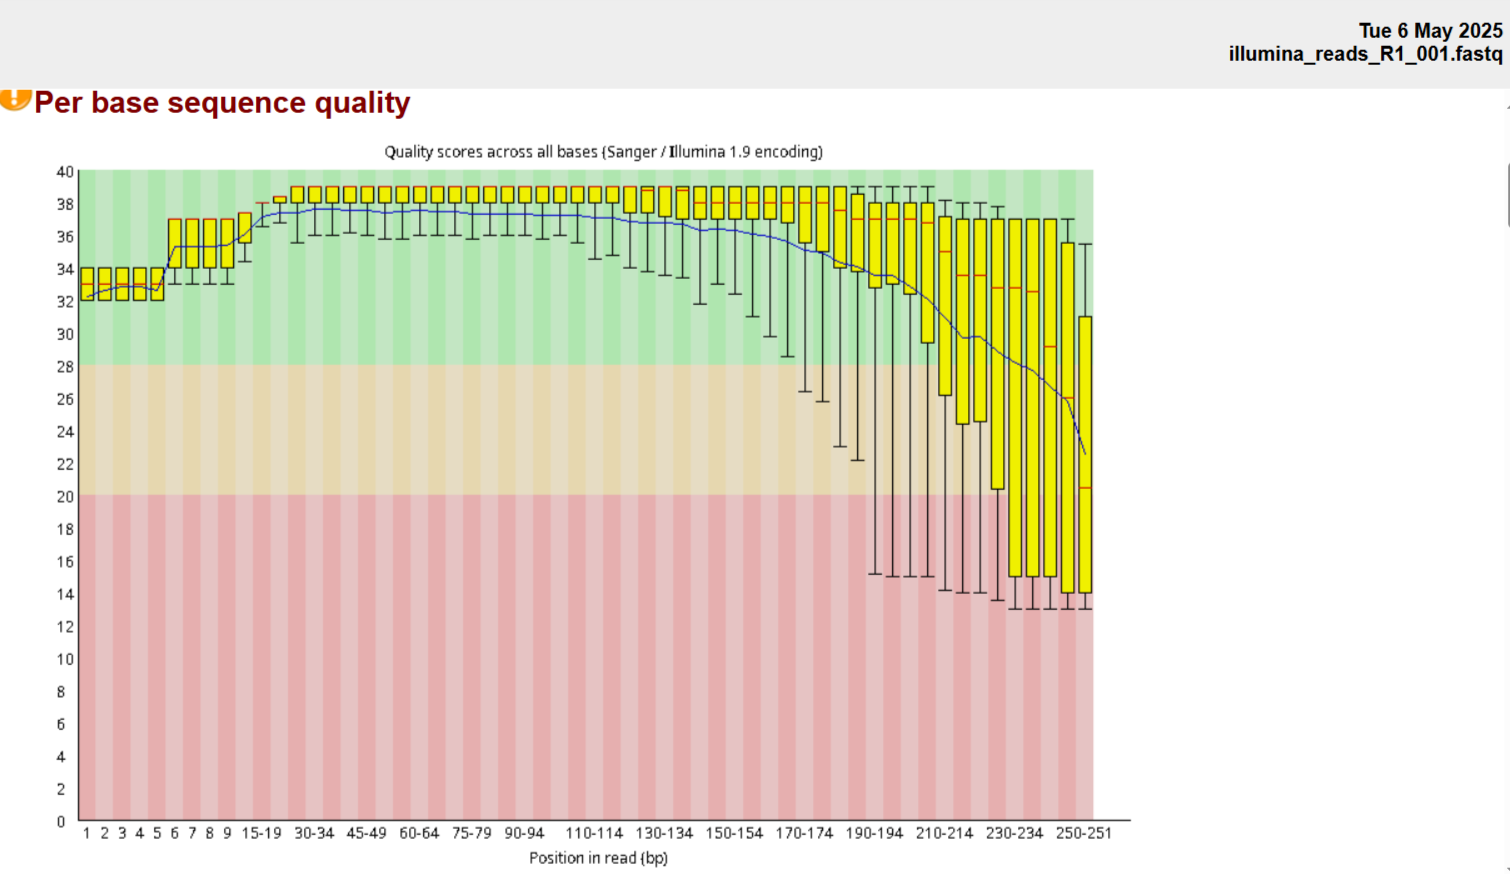
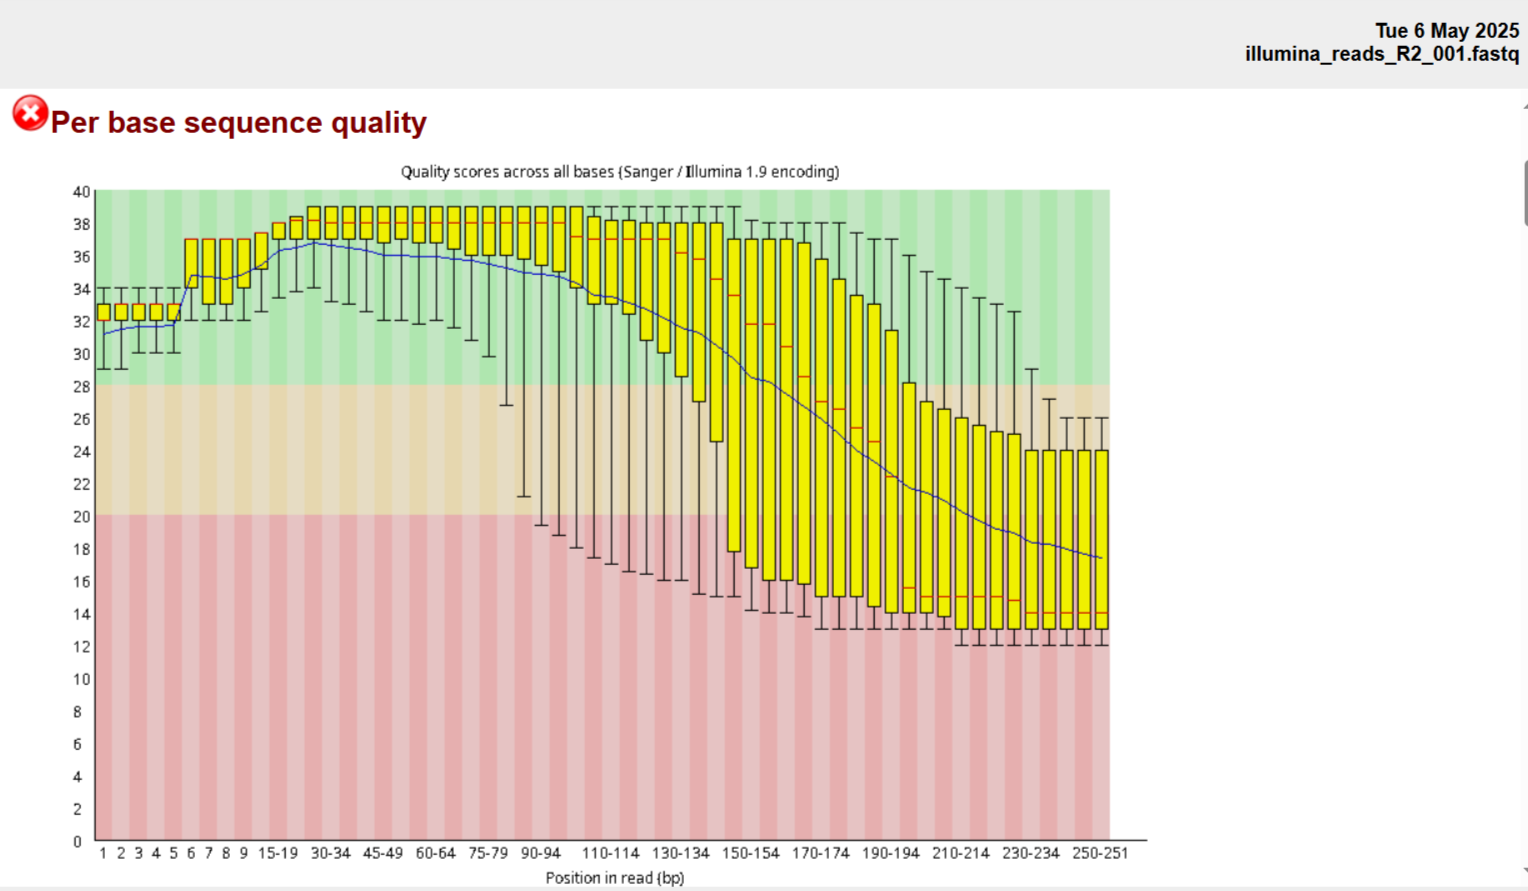

Файл R1 illumina_reads_R1_001.fastq
Снижение качества начинается после 190 bp
В конце ридов наблюдается увеличение разброса желтые боксы и падение среднего качества синяя линия.
Последние 40-50 оснований находятся в зоне с риском оранжевая и плохим качеством

Файл R2 illumina_reads_R2_001.fastq
Значительное падение качества начинается уже с 110-130 bp.
Более 100 последних оснований имеют медианное качество ниже Q25, значительная часть — ниже Q20.
Этот файл имеет более серьёзные проблемы, чем R1.

Проблемы с качеством на концах ридов, есть адаптеры, нужно удалить низкокачественные остования из адаптерных последовательностей.

Создала файл trimming.slurm

#!/bin/bash
#SBATCH --job-name=trimming_job 
#SBATCH --output=trimming.out 
#SBATCH --error=trimming.err  
#SBATCH --time=02:00:00 
#SBATCH --mem=4G     
#SBATCH --cpus-per-task=2 
#SBATCH --nodes=1   
#SBATCH --ntasks-per-node=1     

module load java/1.8.0_60 

INPUT_R1="/projects/mipt_dbmp_biotechnology/genome/illumina_reads_R1_001.fastq"
INPUT_R2="/projects/mipt_dbmp_biotechnology/genome/illumina_reads_R2_001.fastq"
OUTPUT_R1="trimmed_reads/illumina_reads_R1_trimmed.fastq"
OUTPUT_R2="trimmed_reads/illumina_reads_R2_trimmed.fastq"

trimmomatic PE -phred33 $INPUT_R1 $INPUT_R2 $OUTPUT_R1 $OUTPUT_R1.unpaired $OUTPUT_R2 $OUTPUT_R2.unpaired SLIDINGWINDOW:4:20 MINLEN:36

fastqc $OUTPUT_R1 $OUTPUT_R2 -o fastqc_trimmed

Запустила скрипт

sbatch trimming.slurm

Снова запустила FastQC на уже обработанных файлах, чтобы оценить качество триммированных ридов:

fastqc trimmed_reads/illumina_reads_R1_trimmed.fastq trimmed_reads/illumina_reads_R2_trimmed.fastq -o fastqc_trimmed

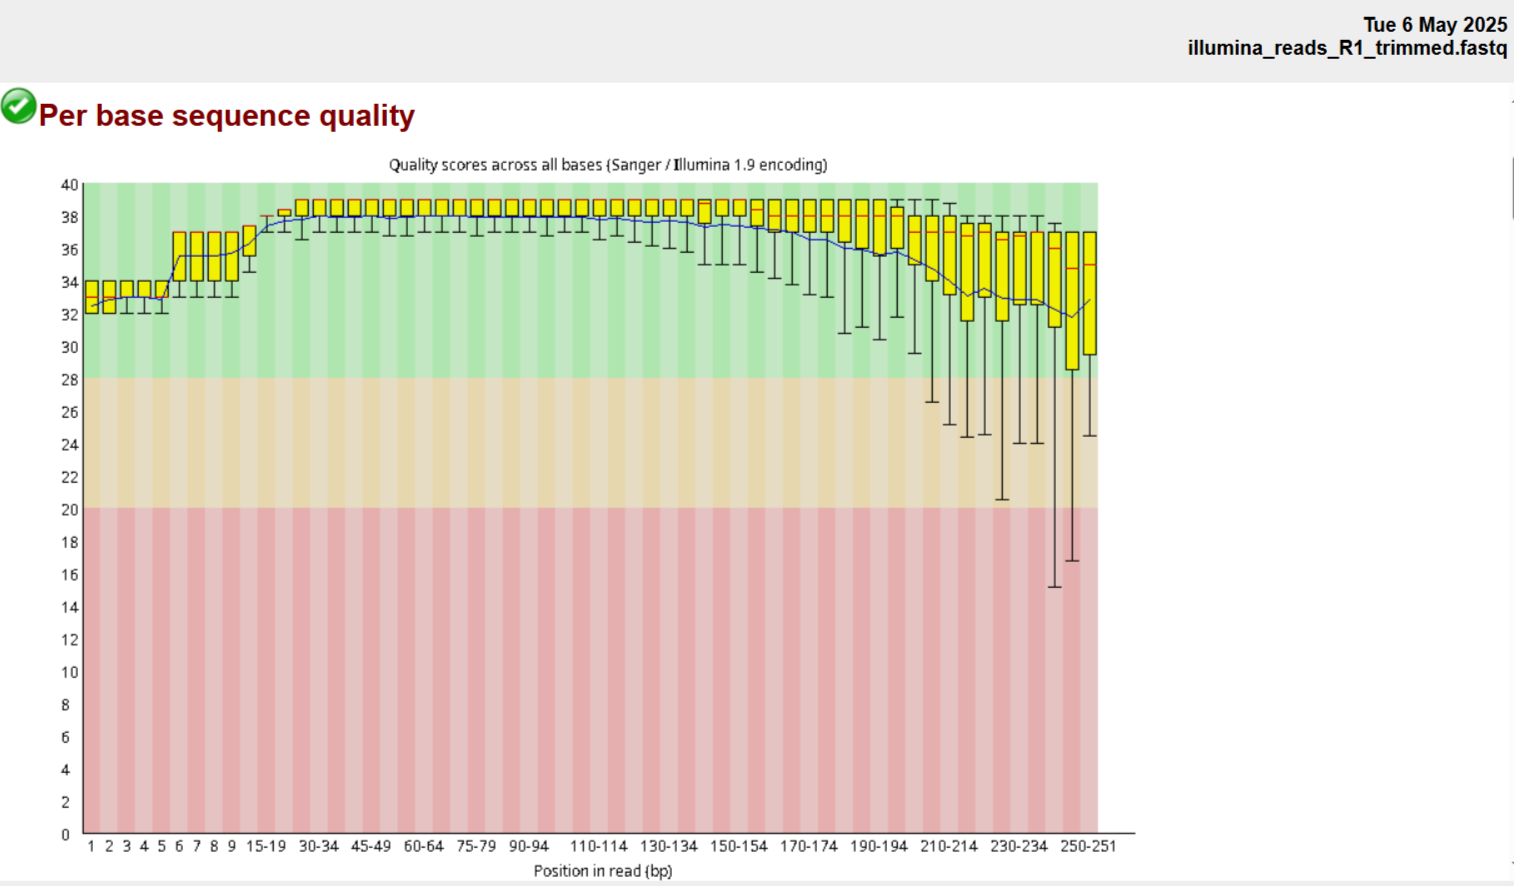

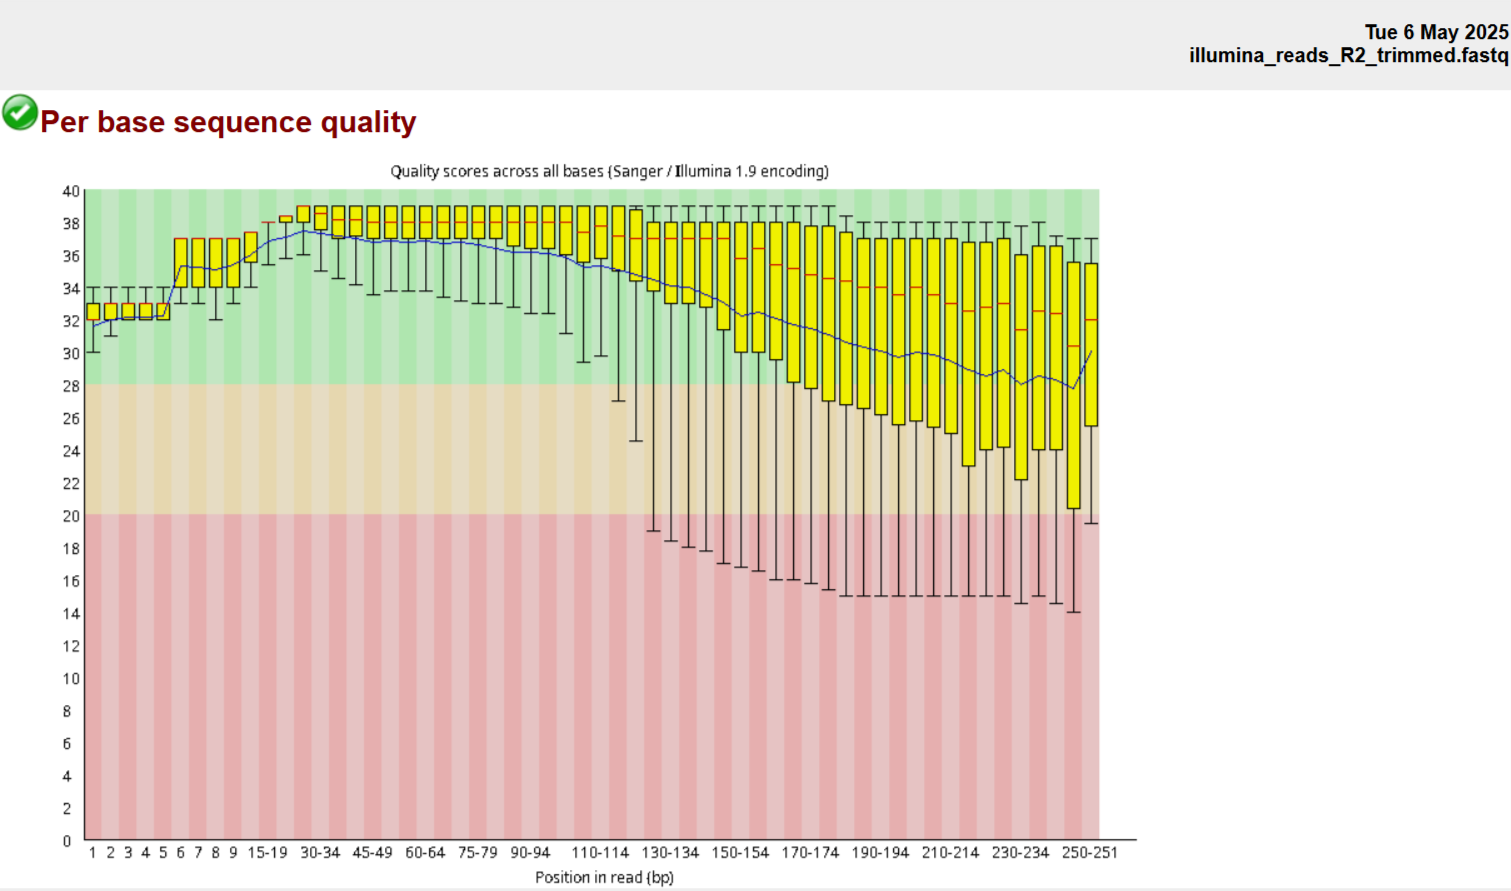


Результаты стали лучше.